# Name: Haqmal Hanif
##Bach 3

In [58]:
import numpy as np
from google.colab import files

# Upload the CSV file
uploaded = files.upload()
import pandas as pd

Saving retail_sales_dataset.csv to retail_sales_dataset (2).csv


In [59]:
# load dataset
file_path=('retail_sales_dataset.csv')
data = pd.read_csv(file_path)

In [60]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [61]:
# column convert to lowercase format and space replace with (_)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [62]:
# summary statistics
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [63]:
# duplicated rows
df.duplicated().sum()

0

In [66]:
# change date data type
df['date'] = pd.to_datetime(df['date'])
time_series_data = data.groupby('Date')['Total Amount'].sum()

In [67]:
# change gender data type
df['gender'] = df['gender'].astype('category')

In [68]:
# change product_category data type
df['product_category'] = df['product_category'].astype('category')

In [69]:
df.dtypes

,0
transaction_id,int64
date,datetime64[ns]
customer_id,object
gender,category
age,int64
product_category,category
quantity,int64
price_per_unit,int64
total_amount,int64


In [70]:
# remove transaction_id which is not useful our analysis
df.drop('transaction_id', axis=1, inplace=True)

In [71]:
# copy dataframe
tem_df = df.copy()

In [72]:
# date
tem_df['date'].describe()

,date
count,1000
mean,2023-07-03 00:25:55.200000256
min,2023-01-01 00:00:00
25%,2023-04-08 00:00:00
50%,2023-06-29 12:00:00
75%,2023-10-04 00:00:00
max,2024-01-01 00:00:00


In [73]:
# gender column frequency
df['gender'].value_counts()

,count
gender,
Female,510
Male,490


<Axes: ylabel='count'>

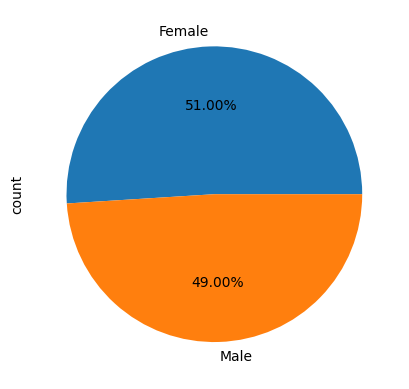

In [74]:
# pie chart
df['gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [75]:
# frequency of product_category
tem_df['product_category'].value_counts()

,count
product_category,
Clothing,351
Electronics,342
Beauty,307


<Axes: xlabel='product_category'>

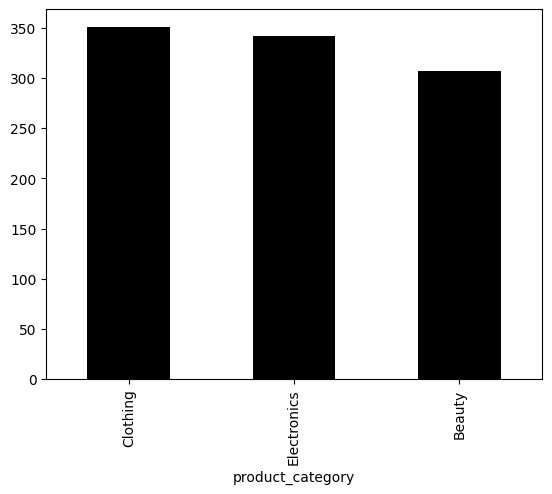

In [76]:
tem_df['product_category'].value_counts().plot(kind='bar', color='black')

In [77]:
# descriptive stats
tem_df['age'].describe()

,age
count,1000.00000
mean,41.39200
std,13.68143
min,18.00000
25%,29.00000
50%,42.00000
75%,53.00000
max,64.00000


<Axes: ylabel='Frequency'>

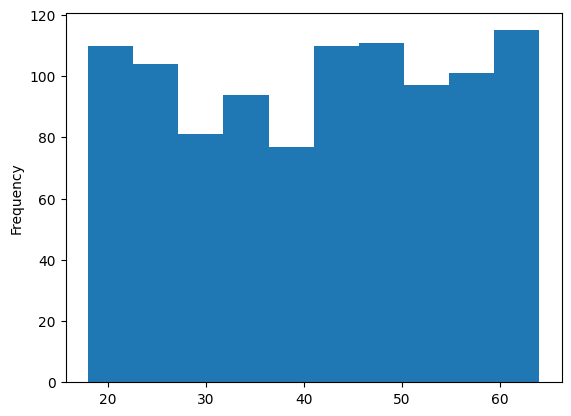

In [78]:
# distribution
tem_df['age'].plot(kind='hist')

In [79]:
# skew score
tem_df['age'].skew()

-0.04881245380328967

In [80]:
# descriptive stats
tem_df['quantity'].describe()

,quantity
count,1000.000000
mean,2.514000
std,1.132734
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,4.000000


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='quantity'>

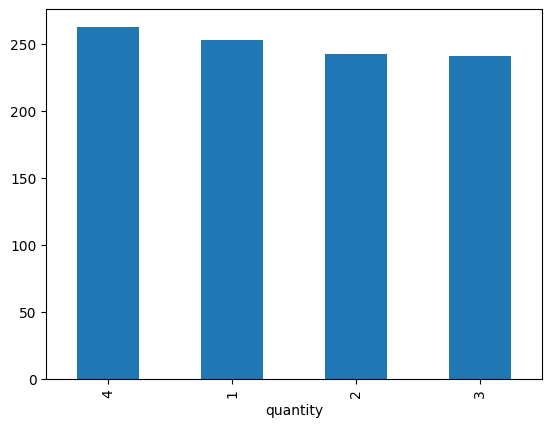

In [82]:
tem_df['quantity'].value_counts().plot(kind='bar')

#### Price Per Unit

In [83]:
# descriptive stats
tem_df['price_per_unit'].describe()

,price_per_unit
count,1000.000000
mean,179.890000
std,189.681356
min,25.000000
25%,30.000000
50%,50.000000
75%,300.000000
max,500.000000


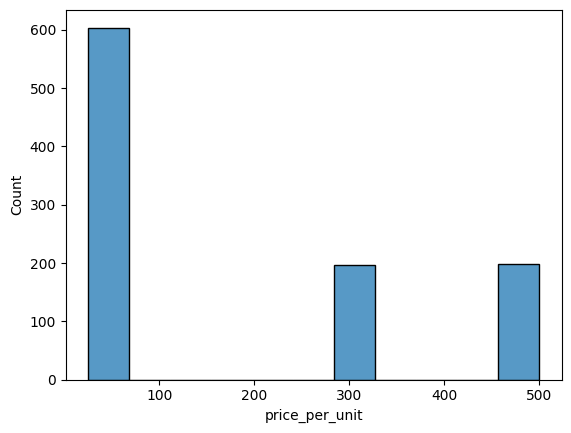

In [84]:
sns.histplot(tem_df, x='price_per_unit')
plt.show()

##### Total Amount

In [85]:
# stats
tem_df['total_amount'].describe()

,total_amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


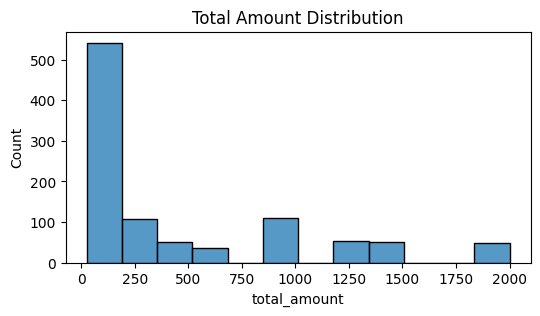

In [86]:
plt.figure(figsize=(6,3))
sns.histplot(tem_df['total_amount'])
plt.title('Total Amount Distribution')
plt.show()

- Numerical vs Numerical

<Axes: xlabel='age', ylabel='total_amount'>

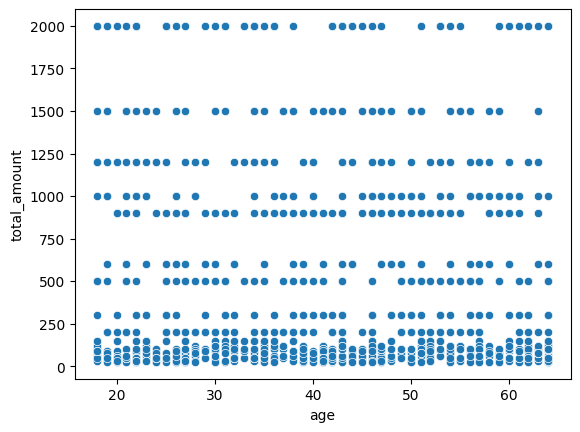

In [87]:
# scatterplot between age and total_amount
sns.scatterplot(tem_df, x='age', y='total_amount')

In [88]:
tem_df['age'].corr(df['total_amount'])

-0.0605680238830457

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

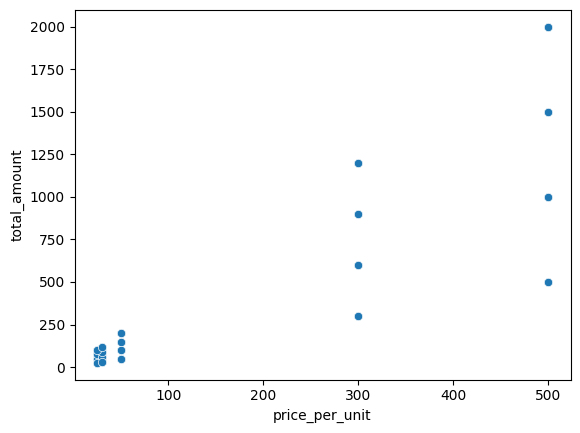

In [89]:
# scatterplot between price_per_unit and total_amount
sns.scatterplot(tem_df, x='price_per_unit', y='total_amount')

In [90]:
# corr score
tem_df['price_per_unit'].corr(df['total_amount'])

0.8519248403554022

<Axes: xlabel='quantity', ylabel='total_amount'>

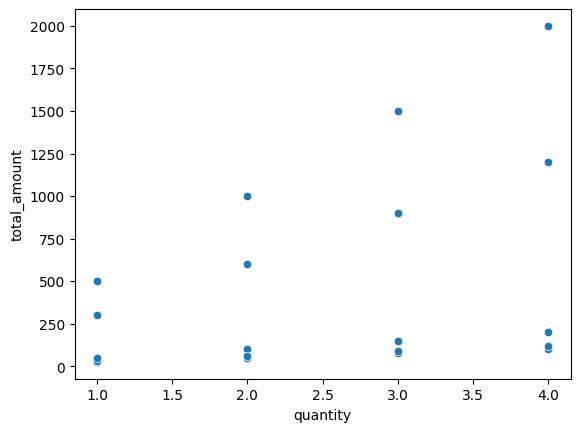

In [91]:
sns.scatterplot(tem_df, x='quantity', y='total_amount')

In [92]:
tem_df['quantity'].corr(df['total_amount'])

0.3737070541214061

- Categorical vs Categorical

In [93]:
# gender and product category
pd.crosstab(df['gender'], df['product_category'])

product_category,Beauty,Clothing,Electronics
gender,,,
Female,166,174,170
Male,141,177,172


In [94]:
# gender and quantity
pd.crosstab(df['gender'], df['quantity'])

quantity,1,2,3,4
gender,,,,
Female,125,120,127,138
Male,128,123,114,125


In [95]:
# product_category and quantity
pd.crosstab(df['product_category'], df['quantity'])

quantity,1,2,3,4
product_category,,,,
Beauty,74,75,85,73
Clothing,88,80,86,97
Electronics,91,88,70,93


In [96]:
pd.crosstab(df['gender'], df['price_per_unit'])

price_per_unit,25,30,50,300,500
gender,,,,,
Female,115,92,98,106,99
Male,95,91,113,91,100


Numerical vs Categorical

<Axes: xlabel='gender', ylabel='total_amount'>

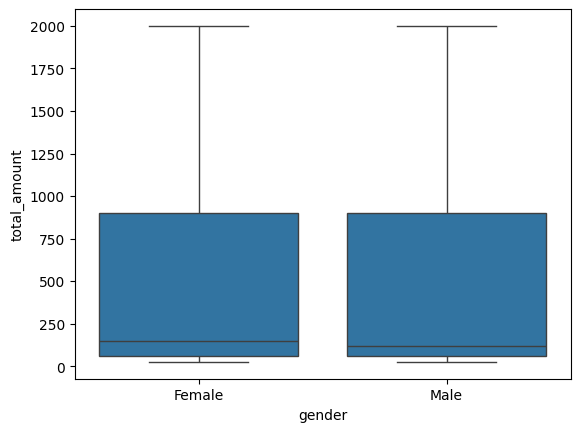

In [97]:
sns.boxplot(tem_df, x='gender', y='total_amount')

- some outliers have in Clothing category

<Axes: xlabel='product_category', ylabel='total_amount'>

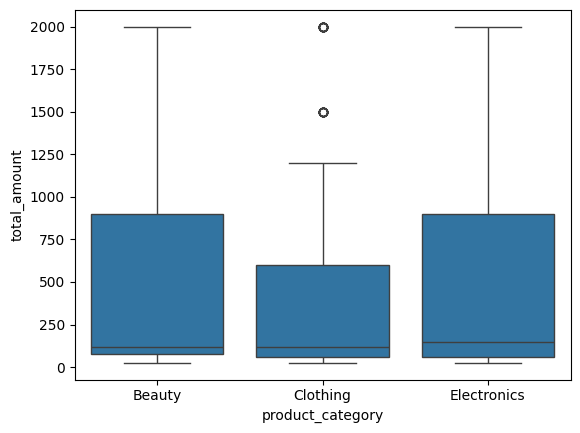

In [98]:
sns.boxplot(tem_df, x='product_category', y='total_amount')

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

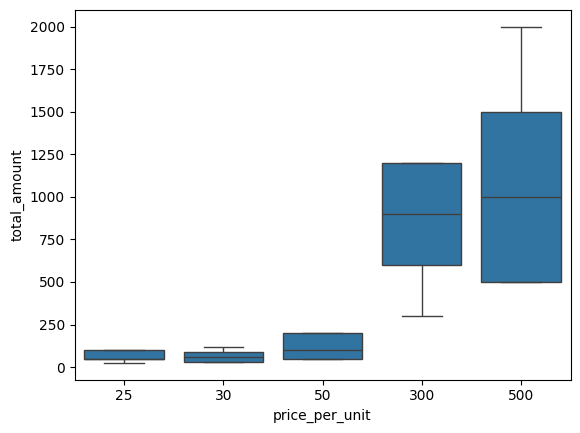

In [99]:
sns.boxplot(tem_df, x='price_per_unit', y='total_amount')

<Axes: xlabel='quantity', ylabel='total_amount'>

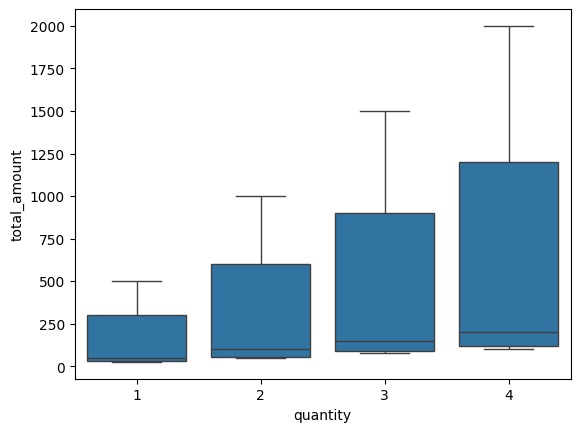

In [100]:
sns.boxplot(tem_df, x='quantity', y='total_amount')

<Axes: xlabel='product_category', ylabel='total_amount'>

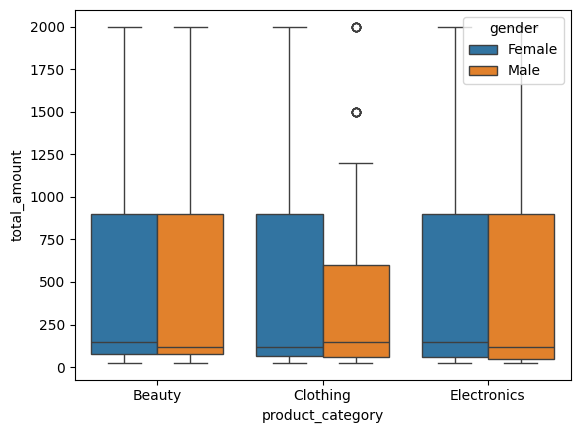

In [101]:
#multi variables analysis
sns.boxplot(tem_df, x='product_category', y='total_amount', hue='gender')

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

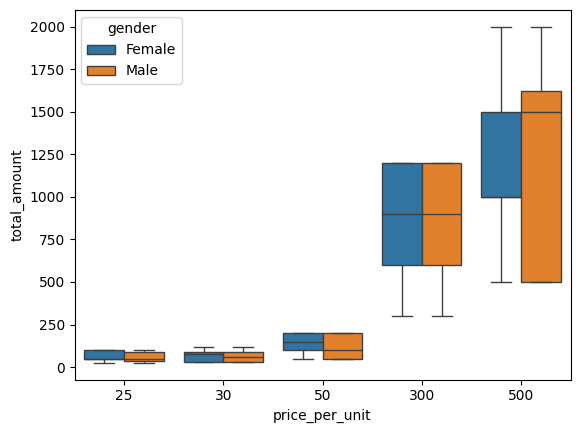

In [102]:
sns.boxplot(tem_df, x='price_per_unit', y='total_amount', hue='gender')

In [103]:
tem_df.groupby(['price_per_unit','gender'])['total_amount'].describe()

count         mean         std    min     25%     50%  \
price_per_unit gender                                                          
25             Female  115.0    63.043478   28.165361   25.0    50.0    50.0   
               Male     95.0    61.052632   28.179655   25.0    37.5    50.0   
30             Female   92.0    74.347826   33.718432   30.0    30.0    75.0   
               Male     91.0    71.538462   34.283883   30.0    30.0    60.0   
50             Female   98.0   131.122449   58.992969   50.0   100.0   150.0   
               Male    113.0   122.566372   57.473266   50.0    50.0   100.0   
300            Female  106.0   786.792453  340.049148  300.0   600.0   900.0   
               Male     91.0   791.208791  333.216097  300.0   600.0   900.0   
500            Female   99.0  1237.373737  554.864547  500.0  1000.0  1000.0   
               Male    100.0  1250.000000  570.751764  500.0   500.0  1500.0   

                          75%     max  
price_per_unit gender                  
25             Female   100.0   100.0  
               Male      87.5   100.0  
30             Female    90.0   120.0  
               Male      90.0   120.0  
50             Female   200.0   200.0  
               Male     200.0   200.0  
300            Female  1200.0  1200.0  
               Male    1200.0  1200.0  
500            Female  1500.0  2000.0  
               Male    1625.0  2000.0

#### Time Series Analysis

<Axes: xlabel='date'>

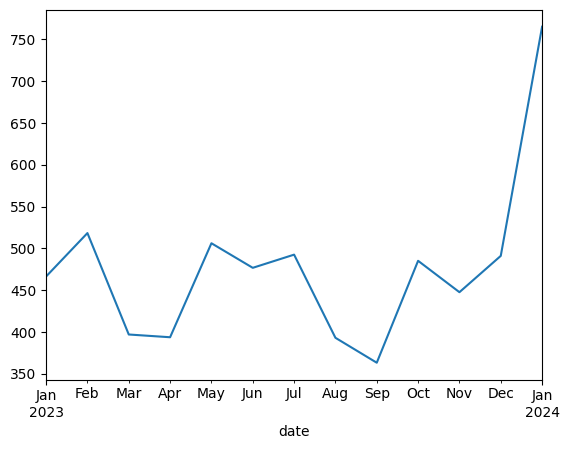

In [104]:
# average montly sales
tem_df.set_index('date', inplace=True)
monthly_window = tem_df['total_amount'].resample('M').mean()
monthly_window.plot()

<Axes: xlabel='date'>

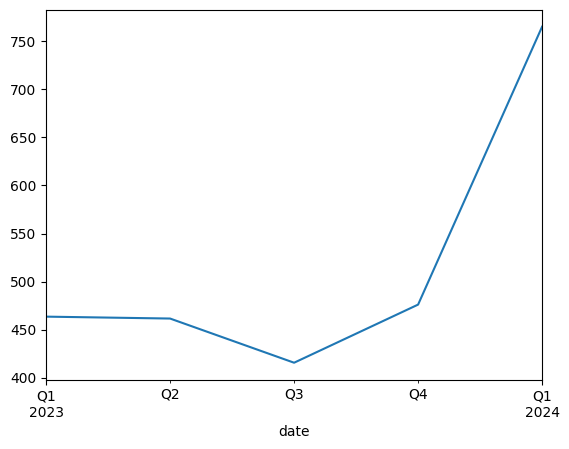

In [105]:
# average quarterly sales
quarterly_window = tem_df['total_amount'].resample('Q').mean()
quarterly_window.plot()

In [ ]:
#pip install pmdarima

In [106]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm  # For auto ARIMA


In [107]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]

In [108]:
# Automatically determine the best ARIMA parameters using pmdarima
auto_model = pm.auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True,
    error_action="ignore",  # Ignore errors and keep searching
    max_p=5, max_d=2, max_q=5  # Search grid for ARIMA parameters
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4946.211, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4852.754, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4895.220, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4821.941, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4799.187, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4795.312, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4792.963, Time=0.07 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=2.96 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=4740.561, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4739.869, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4738.956, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4737.379, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4735.51

In [109]:
# Extract the optimal parameters
best_order = auto_model.order
print(f"Optimal ARIMA order: {best_order}")

Optimal ARIMA order: (0, 0, 0)


In [110]:
# Fit ARIMA model using the optimal parameters
model = ARIMA(train, order=best_order)
model_fit = model.fit()

In [111]:
# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

In [112]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 991.7786990360105
MAE: 800.6805081085466


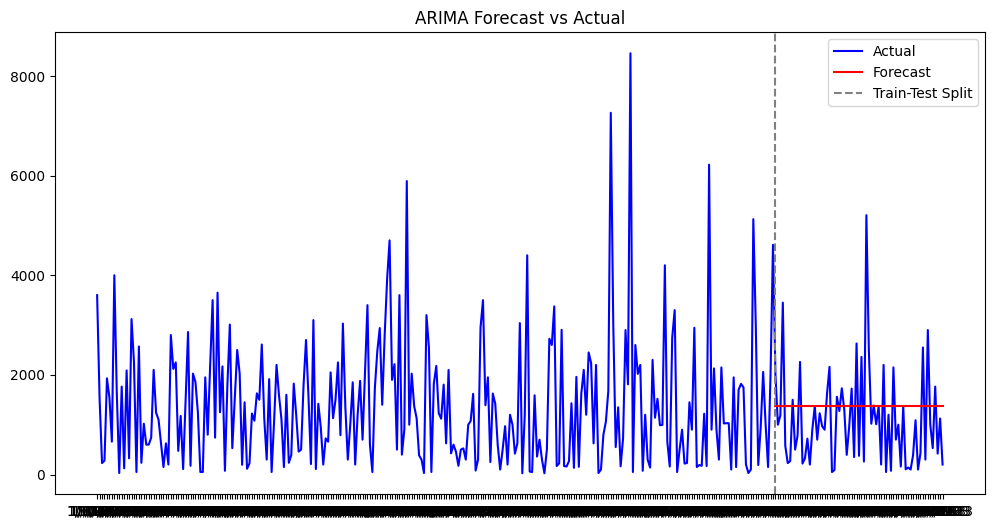

In [113]:
# Visualize actual vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.axvline(x=test.index[0], color='gray', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()
